# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import json
import numpy as np
import requests
import os

## Data Gathering
For this project we have three different data sources: 
1. 'Enhanced' Twitter archive dataset which contains Tweet information from @WeRate Dogs account along with columns(ratings numerator, ratings denominator, type of dog (doggo,fluffer,pupper, puppo)) which were programmatically extracted from the tweet content.

We will directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) and upload the csv file as a dataframe.

In [2]:
#Upload the downloaded csv file into a dataframe
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv). The prediction AI evaluates the images from the twitter posts to predict the animals or objects present.

In [3]:
# Create a folder to add the tsv file to be downloaded
folder_name = 'predictions_archive'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
#Use the request function to directly download tsv file from the URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name,url.split("/")[-1]), mode = 'wb') as file:
    file.write(response.content)


In [5]:
df_prediction = pd.read_csv('predictions_archive/image-predictions.tsv', sep = '\t')
df_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt). The retweet and favorite counts will be contained in this dataset.

In [6]:
""" The JSON file extracted from Twitter API is only copied here because the Twitter API did not come through. But 
the task to read the json text file into a data frame is completed in the next cell block
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
""";

In [7]:
df_tweet = pd.read_json('tweet-json.txt', lines=True)
df_tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [8]:
# convert to csv to aid Visual Assessment
df_tweet.to_csv('tweet-api.csv', index=False)

## Assessing Data

# Quality

## Visual Observations
Visual observations were done by uploading the files to Google Sheets. The following are comments made while observing which will be summarized in the `Quality` and `Tidiness` issues column below.

 `enhanced twitter archive`
 
 1. Extracted Rating numerator and denominator column values are not always dog ratings. E.g. `tweet id` 832088576586297 
 2. `tweet id` 679148763231986 is not a rating of a dog. 
 3. wrong names for dogs such as 'a','an', '10' 'officially'. It appears The naming algorithm picks up words which come after "This is ..." even if they are not dog names. 
Some of the tweets identified:
666063827256086533,666058600524156928,666057090499244032,666055525042405380,666051853826850816,666050758794694657,666044226329800704
666033412701032449,666044226329800704, 667177989038297088

4. id `883482846933004288` a rating of 13.5/10 but the rating is recorded as 5(numerator)/10(deominator). Ratings with decimal points are an issue in extraction as the extracter algorithm ignores the value before the decimals in the tweet text. 

5. the source url column has the html attribute  <href:>

6. Entries of "None" for columns of dog types (Fluffy,Doggy etc.) is misleading because they are essentially null values. 

`tweet-json dataset`
7. tweet ids are saved both as a `string` and an `int`

## Visual Tidiness observations

1. `enhanced twitter archive` 
Doggo, Floofer, Pupper, Puppo columns should be categorical data for the sake of tidiness. 

`tweet-json dataset`

2. Having tweet  in the file extracted from `twitter.json` is redundant as it is already avaiable in the `enhanced twitter archive`




## Programmatic Observations

In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In addition the rating_numerator is set to a datatype of `int64` value though our visual observation had shown that some ratings have decimal points (e.g. 13.5)

The tweet id, retweet user id,in_reply_to_status id  should really not have to be an `float64` because they are just an id to refer to the tweets of users. 

In [10]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Although the data set has very flexible notions of what numerator and denominator values should be as we observed in our visual assesssment, we have also observed the extractor algorithm at times gets the wrong values for them (e.g. picking up dates written as 11/12). So we will look at the extreme minimum and maximum values though it is likely we will miss other values. 

In [11]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

As we can see there are many 'extreme' values for the denominator. Checking for these values if they are actually for dog ratings can be useful to know.

In [13]:
df.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


The query shows that grouped dogs are given a collective rating by adding the denominators but on occassions the extractor picks up dates and false values as denominators (e.g. dates).Values where the denominator is not a multiple of 10 are most likely not dog ratings.



### Quality issues
1. dog names assigned as 'a'.

2. dog names assigne as 'an'

3. wrong  rating_denominator value of 0.

4. data columns for dog types (doggo, floofer, puppo, pupper) ought to be categories contained in 1 column. 

5. wrong rating numerator value of 15.

6. wrong rating numerator value of 2.

7. redundant columns of retweeted_status_id, retweeted_user_id

8. tweets without images included are useless for our dataset.

### Tidiness issues
1.Duplicate Columns for tweets

2.Retweet and Favorite counts from the API extracted table do not need their own tables.

## Cleaning Data
In this section, we will clean **all** of the issues documented while assessing. 

After making copies of the data, The first step is to address tidyness and structural issues of the dataset.

In [14]:
# Make copies of original pieces of data
df_clean = df.copy()
df_prediction_clean = df_prediction.copy()
df_tweet_clean = df_tweet.copy()


### Issue #1: 
Retweet and Like Counts should be added to our main enhanced dataset.

#### Define: 
Merge Retweet and Like Columns from `twitter json` dataset to our main dataframe. Drop extraneous columns.

#### Code

In [15]:
df_tweet_clean = df_tweet_clean[['id','favorite_count','retweet_count']]


In [16]:
df_tweet_clean.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [17]:
df_clean = df_clean.merge(df_tweet_clean,left_on= 'tweet_id', right_on='id')


In [18]:
df_clean.drop(['id'], axis=1, inplace=True)

#### Test

In [19]:
df_clean.columns

# As intended the columns for our clean dataframe now have the favorite count and retweet count columns merged into the dataset.

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'favorite_count', 'retweet_count'],
      dtype='object')

### Issue #2: 
Retweeted tweets are not part of the data to be evaluated.

#### Define

Filter our main data set to include rows where retweet ID is null.

#### Code

In [20]:
df_clean = df_clean[pd.isnull(df_clean['retweeted_status_id'])]

#### Test

In [21]:
df_clean['retweeted_status_id'].notna().sum()

0

### Issue #3: 
Dog names assigned as 'a'

#### Define

Replace 'a' with null values

#### Code

In [30]:
df_clean.name = df_clean.name.replace('a', '')

#### Test

In [31]:
df_clean[df_clean.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count


### Issue #4: 
Dog names assigned as 'an'

#### Define

Replace 'an' with null values

#### Code

In [33]:
df_clean.name = df_clean.name.replace('an', '')

#### Test

In [34]:
df_clean[df_clean.name == 'an']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count


### Issue #5: 
Remove wrong denominator values of 0

#### Define

Remove denominator values which are not for ratings. 

#### Code

In [38]:
df_clean = df_clean[df_clean.rating_denominator > 0]

#### Test

In [40]:
df_clean.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count


### Issue #6 
Remove wrong denominator values of 15

#### Define

Remove it from the dataset as it is not a 'ratings' tweet.

#### Code

In [41]:
df_clean = df_clean[df_clean.rating_denominator != 15]

#### Test

In [42]:
df_clean.query('rating_denominator == 15')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count


### Issue #6 
Remove wrong denominator values of 2

#### Define

Remove it from the dataset as it is not a 'ratings' tweet.

#### Code

In [43]:
df_clean = df_clean[df_clean.rating_denominator != 2]

#### Test

In [44]:
df_clean.query('rating_denominator == 2')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count


### Issue #7 
Doggo,floofer, pupper and puppo columns shold be a column with a category type.

#### Define

Convert this columns into a category type. 

#### Code

In [47]:

df_clean.replace("None", "",inplace=True)

In [50]:
df_clean['dog_type']= df_clean['doggo'] + df_clean['floofer'] + df_clean['pupper'] + df_clean['puppo']


In [54]:
df_clean.drop(['doggo','floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [55]:
df_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,39467,8853,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33819,6514,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25461,4328,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,42908,8964,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,41048,9774,


### Issue #8
retweet-status_id, retweet_status_timestamp are redundant as we have already filtered out retweeted tweets.

#### Define

Drop retweeted_status_id, retweeted_used_id and retweeted_status_timestamp

#### Code

In [56]:
df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1,inplace=True )

#### Test

In [57]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'dog_type'],
      dtype='object')

### Issue #9
Tweets without images are useless for our dataset. As our motivation is to have tweets with pictures and a rating.

#### Define

Merge our `enhanced twitter archive` dataset and `image predictions` dataset

#### Code

In [58]:
df_clean = df_clean.merge(df_prediction_clean,left_on= 'tweet_id', right_on='tweet_id')

#### Test

In [60]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'dog_type', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [59]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


This step technically should have been done earlier but for work purposes it felt that I needed to come to grips with the unclean/untidy aspects of the main dataset. We can do further evaluation of the data to see if we made the right cleaning procedures.

In [61]:
df_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1.993000e+03,2.300000e+01,2.300000e+01,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1.993000e+03,1.993000e+03
mean,7.358857e+17,6.978112e+17,4.196984e+09,12.286503,10.536377,8900.112895,2768.105871,1.203211,0.593809,1.344553e-01,6.026587e-02
std,6.747709e+16,4.359384e+16,0.000000e+00,41.507363,7.320050,12214.686614,4675.481354,0.560899,0.271958,1.006933e-01,5.089751e-02
min,6.660209e+17,6.671522e+17,4.196984e+09,0.000000,7.000000,81.000000,16.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758531e+17,6.732411e+17,4.196984e+09,10.000000,10.000000,1985.000000,627.000000,1.000000,0.362835,5.390140e-02,1.619070e-02
50%,7.084797e+17,6.757073e+17,4.196984e+09,11.000000,10.000000,4138.000000,1360.000000,1.000000,0.587507,1.175080e-01,4.952370e-02
75%,7.878106e+17,7.031489e+17,4.196984e+09,12.000000,10.000000,11310.000000,3220.000000,1.000000,0.845256,1.952180e-01,9.160200e-02
max,8.924206e+17,8.558181e+17,4.196984e+09,1776.000000,170.000000,132810.000000,79515.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [64]:
df_clean.shape

(1993, 24)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [62]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [65]:
# Average rating 
df_clean['rating_numerator'].mean()

12.286502759658806

In [66]:
# Dog types from data set
df_clean['dog_type'].value_counts()

                1687
pupper           203
doggo             63
puppo             22
doggopupper        9
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_type, dtype: int64

In [68]:
df_clean.groupby('dog_type')['rating_numerator'].mean()

dog_type
                12.502667
doggo           11.888889
doggofloofer    11.000000
doggopupper     11.000000
doggopuppo      13.000000
floofer         12.000000
pupper          10.714286
puppo           12.000000
Name: rating_numerator, dtype: float64

### Insights:
1. The average rating is 12.2

2. From dog types labeled, the majority are labeled as puppers (203).

3. A combination of doggo and pupper have the highest dog ratings (13.0). 

### Visualization

In [93]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Dog Types labeled in Twitter archive dataset')

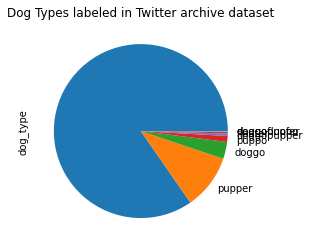

In [94]:
%matplotlib inline

df_clean.dog_type.value_counts().plot(kind="pie")
plt.title('Dog Types labeled in Twitter archive dataset')

            